# Tutorial de Theano

## Tipo de datos

Los tipos de datos en Theano se definen mediante la clase **theano.tensor**.

 * scalar: theano.tensor.dscalar
 * scalar: theano.tensor.iscalar
 * matrices: theano.tensor.dmatrix
 * matrice: theano.tensor.matrix
 * vector: theano.tensor.vector

### Ejemplo 1:

In [2]:
%matplotlib inline
import numpy as np
import theano
import theano.tensor as T

import matplotlib.pyplot as plt

**Paso 1:** 

Definimos las variables. Al contrario que cuando se utiliza el intérprete de *Python* al utilizar el compilador **Theano** de CPU y GPU hay que definir las variables inicialmente comom si fuera un lenguaje de compilación compilado.

In [3]:
x = T.dscalar('x')
y = T.dscalar('y')

Si vemos el tipo de dato que es la variable **x** se muestra que el dato es del tipo de tensor de theano.

In [4]:
type(x)

theano.tensor.var.TensorVariable

**Paso 2:**

Las funciones en **Theano** se definen de forman simbólica y el resultado es otra variable de **Theano**.

In [5]:
z = x + y

In [6]:
type(z)

theano.tensor.var.TensorVariable

**Paso 3:**

Se crea una función con las variables **x** e **y** como varaibles de entrada y **z** como variable de salida.

In [18]:
f = theano.function([x,y], z)

**Paso 4:**
    
Para llamar a la función se actua de la misma forma que en programación orientado a procedimientos.

In [20]:
f(4, 6)

array(10.0)

Este mismo ejemplo se puede realizar de la misma forma con matrices, por ejemplo realizar la suma de dos matrices. Se debe realizar los cuatros pasos definidos anteriormente. 

In [23]:
xm = T.dmatrix('xm')
ym = T.dmatrix('ym')
zm = xm + ym
fm = theano.function([xm, ym], zm)

El objetivo de utilizar **Theano** es definir los datos utilizando el intérprete de **Python** y posteriormente computárlos utilizando el compilador de CPU o GPU de **Theano** para mejorar la eficiencia de cómputo. El resultado devuelto es un tipo de dato de **Python** como intérprete.

In [29]:
# Se define numpy array como datos de entradas.
a = np.array([[1,2], [3,4]])
b = np.array([[10, 20], [30, 40]])

In [30]:
type(a)

numpy.ndarray

In [33]:
# c = a + b
c = fm(np.array([[1,2], [3,4]]), np.array([[10, 20], [30, 40]]))
c

array([[ 11.,  22.],
       [ 33.,  44.]])

In [34]:
type(c)

numpy.ndarray

### Otro ejemplo: Logistic Function

Vamos a hacer el cálculo de la **sign** para un conjunto de números ordenados de forma conjunta.

$$s(x) = \frac{1}{1+e^{-x}}$$

La curva que describe la función anterior es la siguiente:

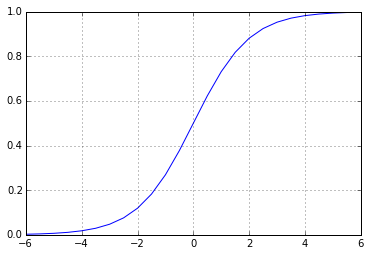

In [46]:
x = np.arange(-6,6.5,0.5) 
plt.plot(x, 1/(1+np.exp(-x)))
plt.grid()

#### Puro Python

In [35]:
def logisticFunction(x):
    return 1/(1+np.exp(-x))

x = np.array([[0,1],[-1,-2]])
logisticFunction(x)

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

#### Puro Theano

In [37]:
# Definimos la variable
x = T.matrix('x')
# Definimos la función simbolicamente
s = 1/(1 + T.exp(-x))
# Definimos la función para theano
logistic = theano.function([x], s)
# Llamamos la función y le introducimos los datos 
#como parámetros de entrada.
x = np.array([[0,1],[-1,-2]])
logistic(x)

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])